#### Objective
* Explore the target variable to check for missing and unique values
* Establishing the feature

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
%%javascript 
//Disable autoscrolling to see entire graph
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

##### 1. Use the DataFrame from the last milestone to find out whether the target variable (“Rain_Tomorrow”) is categorical or numerical.
* Check out the data type of the target variable to figure out which methods
should be used to perform univariate analysis.
*
You can use the .info() report from milestone 1.

In [145]:
# Read Rain in Australia Dataset
df_weather = pd.read_pickle("df_weather.pkl")

In [146]:
# Display first few rows
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

##### 2. Find out the number of missing values in the target variable.

In [147]:
# Use describe to see how many records (count)
df_weather['RainTomorrow'].describe()

count     142193
unique         2
top           No
freq      110316
Name: RainTomorrow, dtype: object

In [148]:
# Determine how many are null using the isnull() function
df_weather.query('RainTomorrow.isnull()').shape

(0, 23)

There are no missing values in the target variable

##### 3. Analyze the labels in the target variable:
* Find out the number of unique labels.
* Get the frequency distribution of values.
* Evaluate the percentage of the frequency distribution for each label.
* Visualize the distribution using the seaborn countplot .

In [149]:
# Get frequency distribution and unique labels
df_weather['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [150]:
# Get percentage distribution of each 
df_weather['RainTomorrow'].value_counts(normalize=True)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

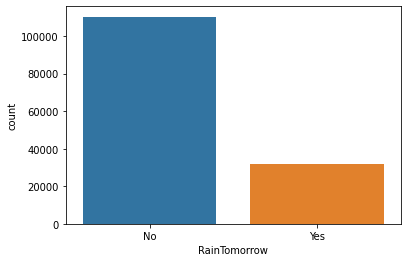

In [151]:
ax = sns.countplot(x="RainTomorrow",data=df_weather)

##### 4. Convert Yes/No labels to integers 1/0 to make calculations easier.

In [152]:
# Assign target variable as a category type - RainTomorrow
df_weather['RainTomorrow'] = df_weather['RainTomorrow'].astype('category')

In [153]:
# Convert to 1 or 0 using cat.codes
df_weather['RainTomorrow'] = df_weather['RainTomorrow'].cat.codes

In [154]:
# Verify conversion
df_weather['RainTomorrow'].value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

In [156]:
# Assign target variable as a category type - RainTomorrow
df_weather['RainToday'] = df_weather['RainToday'].astype('category')
# Convert to 1 or 0 using cat.codes
df_weather['RainToday'] = df_weather['RainToday'].cat.codes

In [157]:
# Verify conversion
df_weather['RainToday'].value_counts()

 0    109332
 1     31455
-1      1406
Name: RainToday, dtype: int64

##### 5. Check out the cardinality of each categorical variable
* Extract day, month and year from the date column
* Drop the original date column.

In [158]:
# Divide columns by numerical and categorical
numerical_columns   = df_weather._get_numeric_data().columns
categorical_columns = list(set(df_weather.columns) - set(numerical_columns))

In [159]:
categorical_columns

['WindDir9am', 'Date', 'WindDir3pm', 'WindGustDir', 'Location']

In [160]:
# Display first rows of categorical_columns
df_weather[categorical_columns].head()

,WindDir9am,Date,WindDir3pm,WindGustDir,Location
0,W,2008-12-01,WNW,W,Albury
1,NNW,2008-12-02,WSW,WNW,Albury
2,W,2008-12-03,WSW,WSW,Albury
3,SE,2008-12-04,E,NE,Albury
4,ENE,2008-12-05,NW,W,Albury


In [161]:
# Display number of possible values in each column, left justify column name for easier reading
for column in categorical_columns:
    number_of_possible_values = len(df_weather[column].value_counts())    
    print(f"{column.ljust(12,' ')}: {number_of_possible_values:,}")

WindDir9am  : 16
Date        : 3,436
WindDir3pm  : 16
WindGustDir : 16
Location    : 49


In [162]:
# Extract month, year, day
df_weather['month'] = pd.DatetimeIndex(df_weather['Date']).month
df_weather['year']  = pd.DatetimeIndex(df_weather['Date']).year
df_weather['day']   = pd.DatetimeIndex(df_weather['Date']).day
# Drop original Date column
df_weather.drop(columns="Date", inplace=True)

##### 6. Evaluate the feature importance for shortlisted variables:
* Find out the correlation coefficient of all the numerical variables with respect to every other feature.
* Visualise the correlation by plotting the data on a heatmap

In [163]:
# Find correlation within variables
weather_correlation = df_weather.corr()
weather_correlation

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,year,day
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,...,-0.461623,0.077625,0.020489,0.901813,0.708865,0.053254,0.083936,-0.204279,0.039245,0.001507
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,...,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.215316,-0.159237,-0.164622,0.058388,-0.000495
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,...,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.500997,0.239032,-0.030863,-0.009284,0.001134
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,...,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.183317,-0.119285,-0.027912,0.084141,-0.007770
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,...,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.318193,-0.450768,0.023885,0.011678,-0.001173
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,...,-0.412922,0.071235,0.109088,0.150258,0.032970,0.145891,0.234010,0.060918,-0.032708,-0.009226
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,...,-0.174916,0.024280,0.053584,0.129298,0.005108,0.094821,0.090995,0.051039,-0.021620,-0.009183
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,...,-0.254988,0.052780,0.025269,0.163601,0.028567,0.074557,0.087817,0.061006,-0.032806,-0.009969
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,...,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.337796,0.257161,-0.090564,0.010708,0.015610
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,...,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.358275,0.446160,-0.018541,-0.009150,0.013207


In [164]:
# Unstack dataframe so it compares variables
variable_comparison = weather_correlation.unstack()
# Sort with highest correlation first
variable_comparison = variable_comparison.sort_values(ascending=False)

In [166]:
# Filter only those where correlation is less than 1 (1 indicates comparison to same variable), convert to DataFrame for easier display
df_correlation_comparison = variable_comparison[variable_comparison<1].to_frame().reset_index()
df_correlation_comparison.columns = ['Variable 1', 'Variable 2','Correlation Coefficient']

In [169]:
# Display 30 top correlations
df_correlation_comparison.head(40)

,Variable 1,Variable 2,Correlation Coefficient
0,Temp3pm,MaxTemp,0.984562
1,MaxTemp,Temp3pm,0.984562
2,Pressure9am,Pressure3pm,0.961348
3,Pressure3pm,Pressure9am,0.961348
4,MinTemp,Temp9am,0.901813
5,Temp9am,MinTemp,0.901813
6,MaxTemp,Temp9am,0.887020
7,Temp9am,MaxTemp,0.887020
8,Temp3pm,Temp9am,0.860574
9,Temp9am,Temp3pm,0.860574


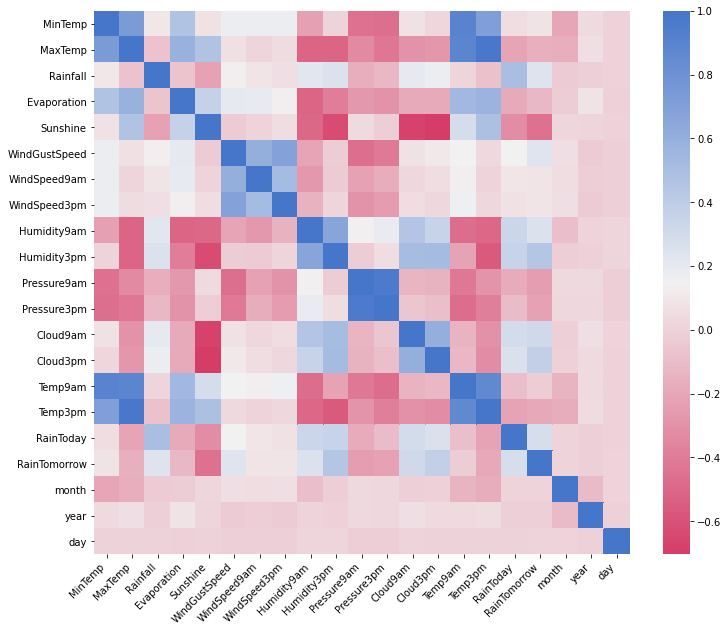

In [168]:
# Display correlation heatmap
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(
    weather_correlation,    
    cmap=sns.diverging_palette(1, 255, n=255),
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

##### 7.Document your findings in Markdown.

Based on the heatmap the temperature, humidity and pressure variable seemed to be highly correlated

Also RainToday is highly correlated to RainTomorrow

In [171]:
# Save as pickle
df_weather.to_pickle("df_weather_2.pkl")